In [1]:
# Dataset Link : https://www.kaggle.com/atharvaingle/crop-recommendation-dataset

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../Data/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.shape

(2200, 8)

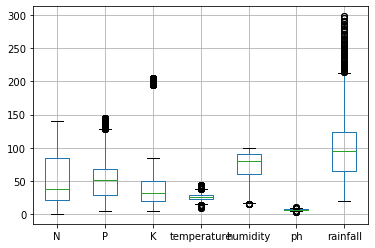

In [6]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A48168D60>,
      dtype=object)

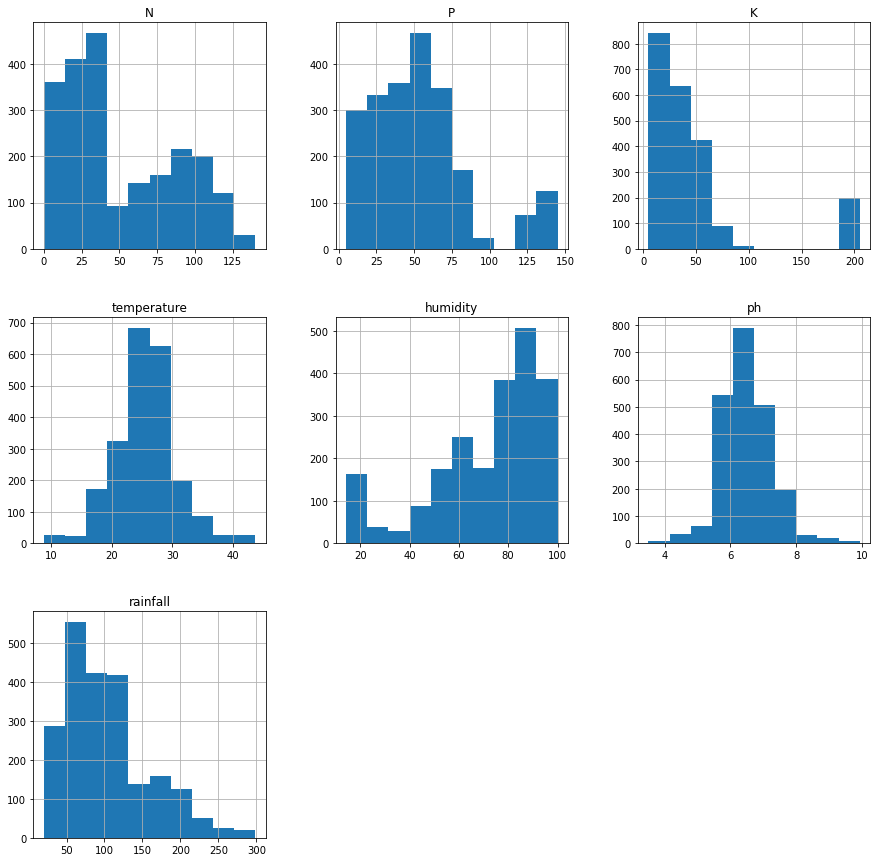

In [7]:
df.hist(figsize=(15,15))

In [8]:
#Removing Outliers
IQR=df.quantile(0.75)-df.quantile(0.25)
lower_bridge=df.quantile(0.25)-(IQR*1.5)
upper_bridge=df.quantile(0.75)+(IQR*1.5)

df = df[~((df < lower_bridge) |(df > upper_bridge)).any(axis=1)]

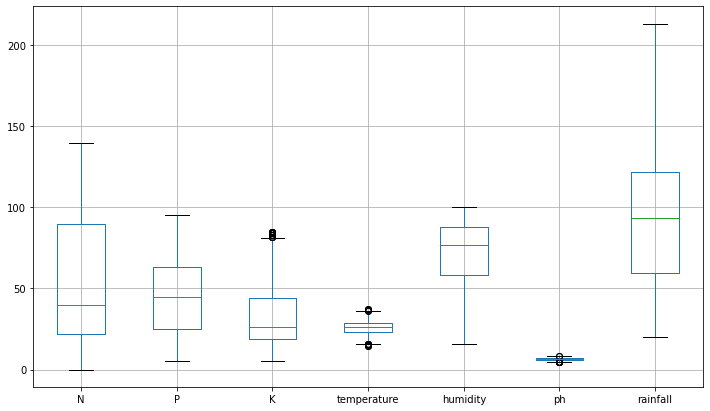

In [9]:
df.boxplot(figsize=(12,7))

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'watermelon', 'muskmelon', 'orange', 'papaya',
       'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

In [11]:
df['label'].value_counts()

blackgram      100
jute           100
lentil         100
pomegranate    100
mungbean       100
banana         100
coffee         100
kidneybeans    100
maize          100
pigeonpeas     100
muskmelon      100
cotton         100
watermelon     100
mango           98
coconut         85
orange          83
chickpea        58
mothbeans       58
papaya          54
rice            32
Name: label, dtype: int64

In [12]:
X = df.drop(['label'], axis = 1)
Y = df['label']
labels = df['label']

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.25,random_state =2)

In [14]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)
from sklearn import metrics
acc_score = metrics.accuracy_score(Ytest,predicted_values)
acc_score

1.0

In [15]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
acc_score = metrics.accuracy_score(Ytest,predicted_values)
acc_score

0.9705882352941176

In [16]:
#Guassian Naive Bayes 
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
acc_score = metrics.accuracy_score(Ytest,predicted_values)
acc_score

0.995475113122172

In [17]:
#SVC
from sklearn.svm import SVC

SVM = SVC(gamma='auto')
SVM.fit(Xtrain,Ytrain)
predicted_values = SVM.predict(Xtest)

acc_score = metrics.accuracy_score(Ytest,predicted_values)
acc_score

0.09502262443438914

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
acc_score = metrics.accuracy_score(Ytest,predicted_values)
acc_score

0.9660633484162896

In [19]:
# Saving the Model.pkl file
import pickle

model = open('../Models/model.pkl', 'wb')
pickle.dump(RF, model)

model.close()